In [0]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn import datasets

In [0]:
np.random.seed(0)

npoints = 500
X,y = datasets.make_circles(n_samples=npoints,factor= 0.2, noise = 0.1,random_state= 123)

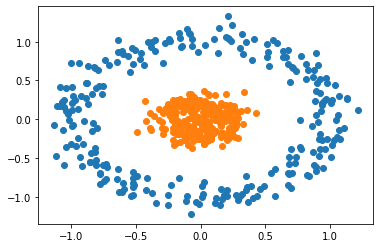

In [4]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [20]:
model= Sequential()
model.add(Dense(units = 5,input_shape = (2,),activation = 'sigmoid'))
model.add(Dense(units = 1,activation = 'sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 15        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(Adam(0.01),'binary_crossentropy',metrics = ['accuracy'])

In [22]:
h = model.fit(X,y,epochs = 200,batch_size = 20,verbose = 1,shuffle = True)

Epoch 1/200
500/500 [==============================] - 0s 185us/step - loss: 0.7416 - accuracy: 0.5000
Epoch 2/200
500/500 [==============================] - 0s 51us/step - loss: 0.6933 - accuracy: 0.5060
Epoch 3/200
500/500 [==============================] - 0s 47us/step - loss: 0.6934 - accuracy: 0.5000
Epoch 4/200
500/500 [==============================] - 0s 46us/step - loss: 0.6930 - accuracy: 0.5240
Epoch 5/200
500/500 [==============================] - 0s 50us/step - loss: 0.6928 - accuracy: 0.5700
Epoch 6/200
500/500 [==============================] - 0s 55us/step - loss: 0.6927 - accuracy: 0.4720
Epoch 7/200
500/500 [==============================] - 0s 49us/step - loss: 0.6928 - accuracy: 0.5620
Epoch 8/200
500/500 [==============================] - 0s 49us/step - loss: 0.6920 - accuracy: 0.5540
Epoch 9/200
500/500 [==============================] - 0s 49us/step - loss: 0.6910 - accuracy: 0.4920
Epoch 10/200
500/500 [==============================] - 0s 49us/step - loss: 0.68

In [0]:
accuracy  = h.history['accuracy']
loss =  h.history['loss']

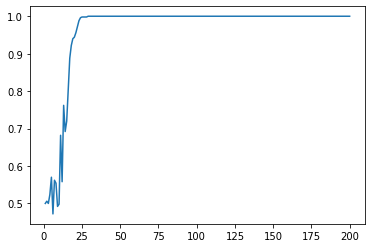

In [27]:
plt.plot(range(1,len(accuracy)+1),accuracy)

In [0]:
def plot_decision_boundary(X,y,model):
  xspan = np.linspace(X[:,0].min() - 0.25,X[:,1].max() + 0.25)
  yspan = np.linspace(X[:,1].min() - 0.25,X[:,1].max() + 0.25)
  xx,yy = np.meshgrid(xspan,yspan)
  xx_,yy_ = xx.ravel(),yy.ravel()
  grid = np.c_[xx_,yy_]
  predictions = model.predict(grid)
  z = predictions.reshape(xx.shape)
  plt.contourf(xx,yy,z)


Prediction :  [[0.9991716]]


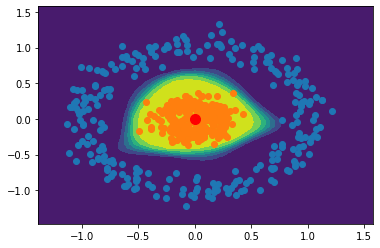

In [26]:
plot_decision_boundary(X,y,model)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
point  = np.array([[0,0]])
pred = model.predict(point)
print('Prediction : ',pred)
plt.plot(point[0][0],point[0][1],marker  = 'o',markersize = 10,color = 'red')